Using TensorFlow backend.


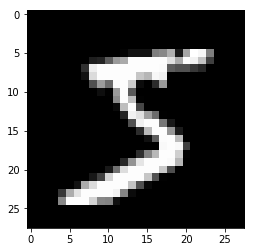

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

from keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data('/tmp/mnist.npz')

plt.imshow(X_train[0], cmap='gray')

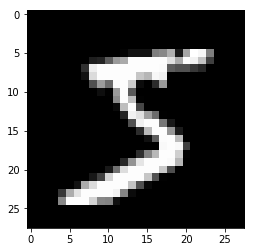

In [2]:
from keras.utils.np_utils import to_categorical

X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)

y_train.shape

plt.imshow(X_train[0,:,:,0], cmap='gray')
i = 8

In [3]:
X_train_new = X_train.reshape(-1, 28*28, 1)
X_test = X_test.reshape(-1,28*28,1)
X_train_new.shape

(60000, 784, 1)

In [4]:
from keras.models import Sequential
from keras.layers import Dense,LSTM
import keras.backend as K
from keras.callbacks import EarlyStopping

K.clear_session()
model = Sequential()

model.add(LSTM(32, input_shape=(28*28, 1)))

model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_1 (LSTM)                (None, 32)                4352      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 4,682
Trainable params: 4,682
Non-trainable params: 0
_________________________________________________________________


In [5]:
model.fit(X_train_new, y_train_cat, epochs=600,
          batch_size=128, verbose=1)

Epoch 1/600
60000/60000 [==============================] - 289s 5ms/step - loss: 1.9018 - acc: 0.2789
Epoch 2/600
11392/60000 [====>.........................] - ETA: 3:48 - loss: 1.7116 - acc: 0.3542

KeyboardInterrupt: 

In [ ]:
result = model.evaluate(X_test, y_test_cat)

print("Accuracy on test set: ",result[1]*100,"%")
